<a href="https://colab.research.google.com/github/salilsharma1901/US-Accidents-Exploratory-Data-Analysis/blob/main/us_accidents_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US-Accidents-Exploratory-Data-Analysis




## Steps followed for this Analysis

- Import Dataset from Kaggle

- Import relevant modules

- Data Cleaning & Preparation

- Exploratory Data Analysis

- Summary and Conclusion

# Download the Data

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


# Importing the relevant modules

In [3]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
dataset = './us-accidents/US_Accidents_Dec20_updated.csv'

In [5]:
us_accidents = pd.read_csv(dataset)

In [6]:
us_accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [7]:
us_accidents.shape

(1516064, 47)

In [8]:
us_accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Data Cleaning & Preparation

In [9]:
# We will look at summary statistics for columns with numeric data
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [10]:
us_accidents.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [11]:
missing_data = us_accidents.isna().sum(axis=0).sort_values(ascending=True)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

,missing_count
Sunrise_Sunset,83
Civil_Twilight,83
Astronomical_Twilight,83
Nautical_Twilight,83
City,83
Zipcode,935
Timezone,2302
Airport_Code,4248
Weather_Timestamp,30264
Pressure(in),36274


In [12]:
cities = us_accidents['City'].unique()
len(cities)

10658

In [13]:
# All cities by number of accidents

accidents_by_cities = us_accidents['City'].value_counts()
accidents_by_cities

Los Angeles       39984
Miami             36233
Charlotte         22203
Houston           20843
Dallas            19497
                  ...  
Swea City             1
Smiths Grove          1
Monmouth Beach        1
Broussard             1
Seven Hills           1
Name: City, Length: 10657, dtype: int64

In [14]:
#Top 10 cities by number of accidents

accidents_by_cities[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

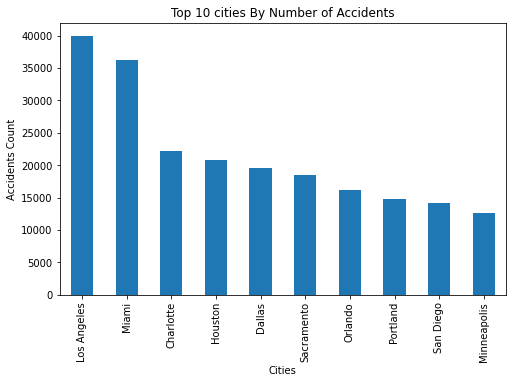

In [15]:
#Bar Chart to Visualize Top 10 cities by number of accidents

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [16]:
'New York' in us_accidents['City']

False

## Exploratory Data Analysis

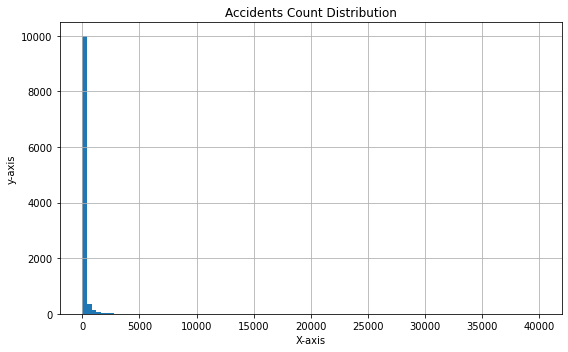

In [17]:
# Let's see how the accidents by cities is distributed

fig, axs = plt.subplots(1, 1,
                        figsize =(8, 5),
                        tight_layout = True)
accidents_by_cities.hist(bins=100)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count Distribution')

plt.show()

We can see that majority of the cities have less than 5000 accidents, most cities accidents count is closer to 1000

In [18]:
# Let's group the data by high and low

high_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities>=1000]
low_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities<1000]

In [19]:
# Let's find percentages

len(high_accident_cities)/len(cities)*100

2.3550384687558643

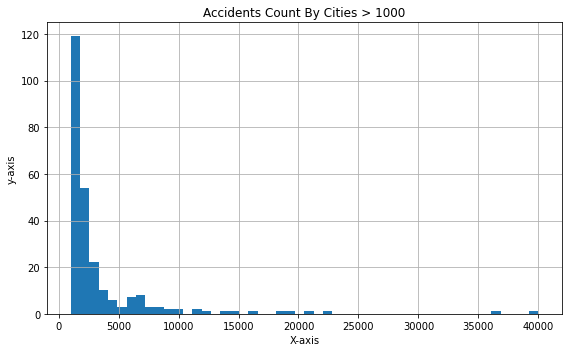

In [20]:
# Zoom in on the data distribution for cities with high accidents

fig, axs = plt.subplots(1, 1,figsize =(8, 5), tight_layout = True)

high_accident_cities.hist(bins = 50)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count By Cities > 1000')

plt.show()

In [21]:
# Accidents by order of severity (1 being lowest, and 4 being highest)

us_accidents.groupby('Severity').count()['ID']

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

In [22]:
# Accidents severity

accidents_severity = us_accidents.groupby('Severity').count()['ID']
accidents_severity

Severity
1      28178
2    1212382
3     161052
4     114452
Name: ID, dtype: int64

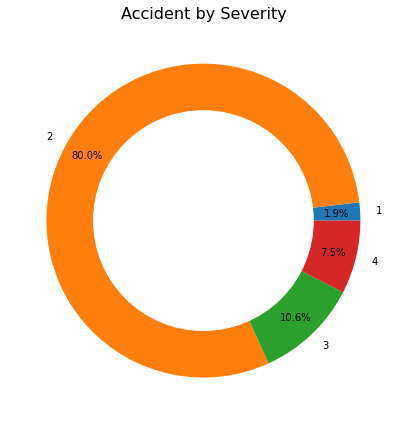

In [23]:
# Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

7.5% of the accidents recorded were found to be very severe

In [24]:
# Let's work with the dates 
# (we find it's in wrong format, let's change that)

us_accidents['Start_Time'].dtypes

dtype('O')

In [25]:
us_accidents['End_Time'].dtypes

dtype('O')

In [26]:
us_accidents = us_accidents.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
us_accidents['Start_Time'].dtypes

dtype('<M8[ns]')

In [27]:
us_accidents['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

In [28]:
us_accidents['End_Time'][0]

Timestamp('2016-02-08 06:37:08')

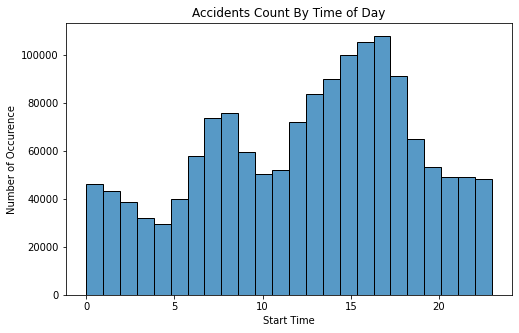

In [29]:
# Plot the distribution of occurence by time of the day.
# We can see the time of the day mof accidents happen, 4pm-6pm

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

More accidents happened between 7am-8am, and 4pm-5pm. These are the times people usually go to and return from work, could this be the cause? We'll investigate further by looking at occurences by day of the week.

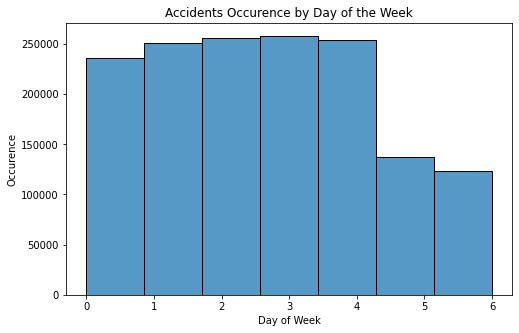

In [30]:
# Let's plot by day of the week 

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

Accidents occurence are high on weekdays & low on weekends, both evenly distributed. Interesting. This could be down to having more people on the road on week days due to work. We will drill down by weekend days.

In [31]:
# Create a variable of the weekend days (Saturday & Sunday) for the next analysis

saturday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 5]
sunday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 6]

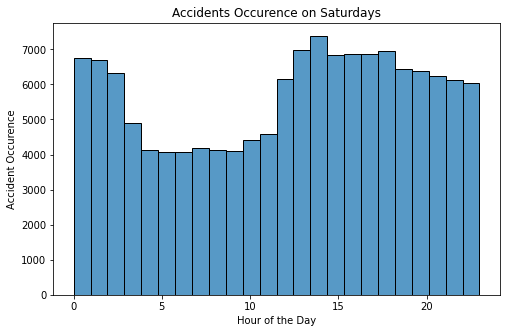

In [32]:
# The accident occurence pattern on Saturday is quite interesting. I have an idea why it is like this.

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

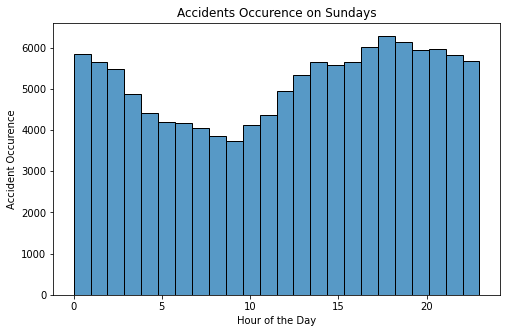

In [33]:
# this is even more interesting.

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

In [34]:
# Let's pick a random day of the week and check the distribution

import random

In [35]:
# Let's get a random week day, and it gives us 1
weekdays_in_numbers = [0,1,2,3,4]
random_num = random.choice(weekdays_in_numbers)
random_num

3

In [36]:
# Let's plot day 1, which is Tuesday (Note that python indexing starts at 0)

tuesday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 1]

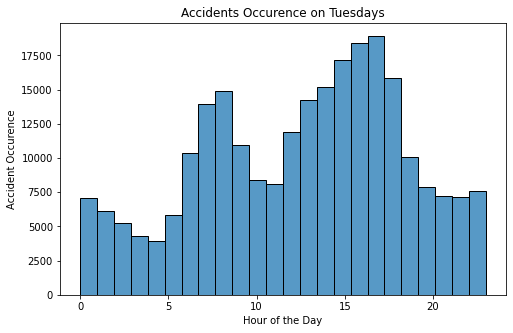

In [37]:
# Graph is similar to the general (all week days) accidents occurence graph
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(tuesday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Tuesdays')

plt.show()

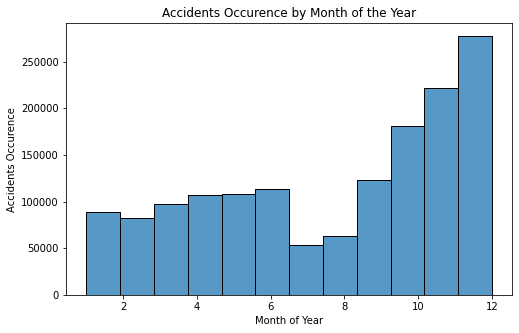

In [38]:
#Moving on, we can plot by month of the year

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month of the Year')

plt.show()

Accidents occurence tend to drop during summer months & pick up by Winter. Interesting trend. Also note that data collection started February 2016. So, not data in January 2016 might have affected the spread somewhat.

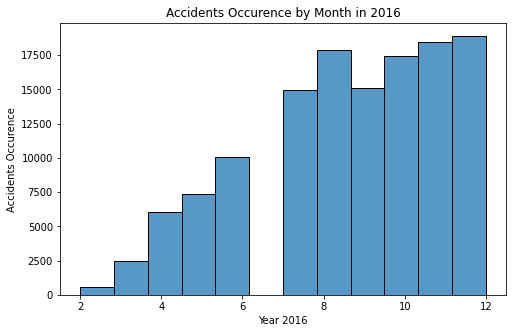

In [39]:
# Let's drill down by individual years, then check the month trend

fig, ax = plt.subplots(figsize=(8,5))
dt_2016 = us_accidents[us_accidents['Start_Time'].dt.year==2016]
sns.histplot(dt_2016['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2016")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2016')

plt.show()

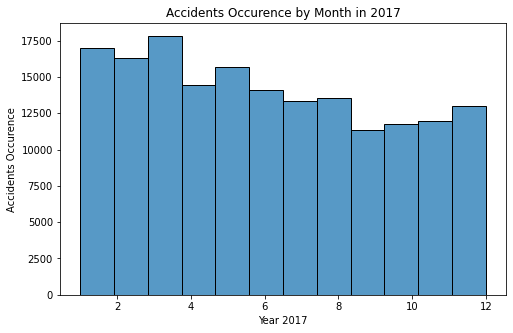

In [40]:
# Let's drill down by individual years, then check the month trend

fig, ax = plt.subplots(figsize=(8,5))
dt_2017 = us_accidents[us_accidents['Start_Time'].dt.year==2017]
sns.histplot(dt_2017['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2017")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2017')

plt.show()

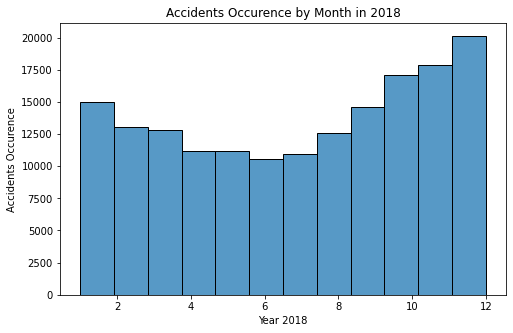

In [41]:
# Let's drill down by individual years, then check the month trend

fig, ax = plt.subplots(figsize=(8,5))
dt_2018 = us_accidents[us_accidents['Start_Time'].dt.year==2018]
sns.histplot(dt_2018['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2018")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2018')

plt.show()

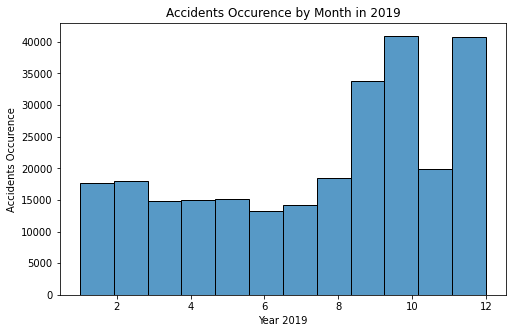

In [42]:
# Let's drill down by individual years, then check the month trend

fig, ax = plt.subplots(figsize=(8,5))
dt_2019 = us_accidents[us_accidents['Start_Time'].dt.year==2019]
sns.histplot(dt_2019['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2019")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2019')

plt.show()

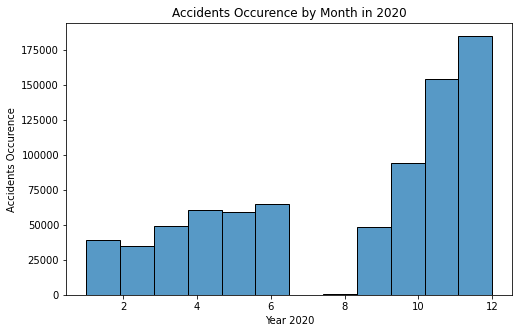

In [43]:
# Let's drill down by individual years, then check the month trend

fig, ax = plt.subplots(figsize=(8,5))
dt_2020 = us_accidents[us_accidents['Start_Time'].dt.year==2020]
sns.histplot(dt_2020['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2020")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2020')

plt.show()

An observation - Data for 2017 & 2018 seems more balanced, while there were missing data in 2016 and 2020 (2016 start of data collection so system might not have been fully in place).

For 2020 I can't offer an explanation for missing/inadequate data.

I would have expected 2019 graph to look similar to 2017 & 2018.For some reasons, it's not. I would appreciate someone more experienced to explain this or drill down further.

In [44]:
# Moving on, what side of the road are accidents happening?

side_of_road =  us_accidents.groupby(['Side']).count()['ID']
side_of_road

Side
L     221502
R    1294562
Name: ID, dtype: int64

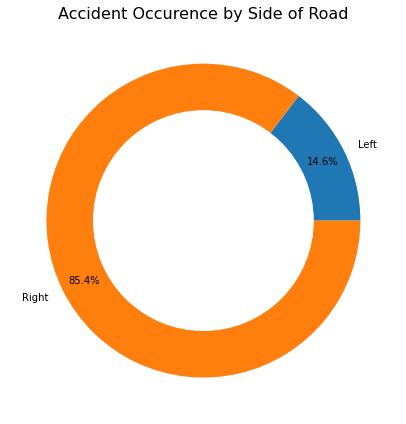

In [45]:
# Let's visualize that

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = ['Left', 'Right']
plt.pie(side_of_road, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident Occurence by Side of Road",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

More accidents are happening on the right side of the roads!

In [46]:
# What are the weather conditions at the time of accicent occurence

weather_conditions = us_accidents.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                78
Blowing Dust / Windy        79
Blowing Snow               144
Blowing Snow / Windy        63
Clear                   180223
                         ...  
Tornado                      2
Volcanic Ash                 4
Widespread Dust             43
Wintry Mix                1251
Wintry Mix / Windy          30
Name: ID, Length: 116, dtype: int64

In [47]:
# Weather conditions at time of occurence sorted

weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                         465252
Mostly Cloudy                193595
Clear                        180223
Cloudy                       161291
Partly Cloudy                133102
                              ...  
Low Drifting Snow                 1
Heavy Blowing Snow                1
Sand / Dust Whirls Nearby         1
Mist / Windy                      1
Heavy Freezing Drizzle            1
Name: ID, Length: 116, dtype: int64

In [48]:
# Time of accident occurence sorted and filtered to top 20

weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                     465252
Mostly Cloudy            193595
Clear                    180223
Cloudy                   161291
Partly Cloudy            133102
Overcast                  87853
Light Rain                72511
Scattered Clouds          47061
Light Snow                22113
Fog                       19777
Haze                      17706
Rain                      17389
Fair / Windy               6631
Heavy Rain                 6119
Light Drizzle              4307
Mostly Cloudy / Windy      3612
Smoke                      3608
Cloudy / Windy             3300
Snow                       2730
Partly Cloudy / Windy      2125
Name: ID, dtype: int64

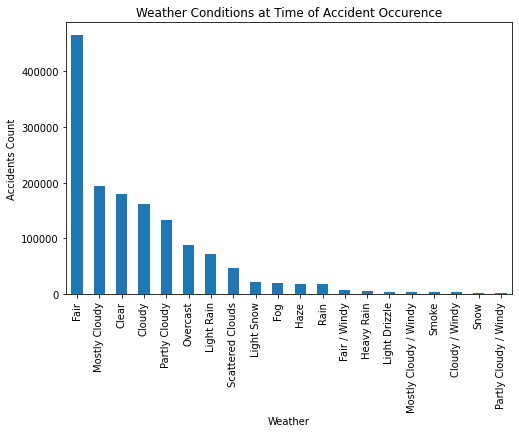

In [49]:
# Let's visualize top 20 weather conditions at the time of accident occurence

fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

## Summary and Conclusion

Accidents more likely to happen in peak hours (Morning & evening). This could be explained by having more people on the road heading to work or business activities.

Accidents happened more frequently on the right side of the road.

Week days (work days) recorded more accidents than weekends.

Accidents happened less frequently in summer months, than winter months. However, looking at the data, much data was not collected in some summer months - so, this could skew the analysis.

A further probe of the data sources is recommended in other to ascertain the irregularities of the histograms for 2016, and 2020. Was enough data captured in these years? Could reveal more insights.

Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

Los Angeles was the city with the highest number of accidents but take note that there was no data from New York (the most populated city in the US). So, I would imagine NY would have had the highest?